# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/DC_vs_marvel.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[DC](https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters)** and **[Marvel](https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters)** characters. 

To create the network, we will download the Wikipedia pages for all characters in each of the DC and Marvel universes. Next, we ill create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Spider-Man](https://en.wikipedia.org/wiki/Spider-Man) links to [Superman](https://en.wikipedia.org/wiki/Superman), for example (it really does, but most links are "within-universe").

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the character-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the characters on wikipedia
* Generate the network of characters on wikipedia. 
* Calculate some simple network statistics.

## The informal intro (not to be missed)

Today I talk about 

* The COVID-19 situation
* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

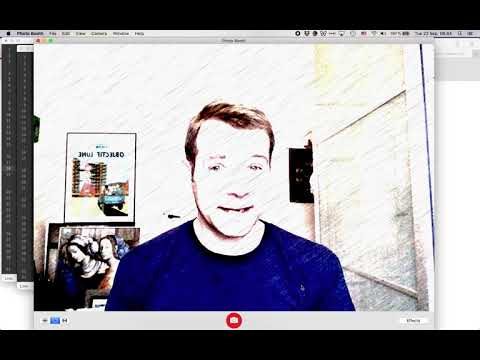

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("FCP8HgvzZKc",width=800, height=450)

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?

**_Regular expressions are tiny programming language used for matching patterns within set of possible strings with specified rules._**

In [4]:
import re

str = 'an example word:cat!!'
match = re.search(r'word:\w\w\w', str)

# If-statement after search() tests if it succeeded
if match:
    print('found', match.group()) ## 'found word:cat'
else:
    print('did not find')

found word:cat


In [5]:
# Search for pattern 'iii' in string 'piiig'.
# All of the pattern must match, but it may appear anywhere.
# On success, match.group() is matched text.

match = re.search(r'iii', 'piiig') # found, match.group() == "iii"
match = re.search(r'igs', 'piiig') # not found, match == None

print(match)

# . = any char but \n
match = re.search(r'..g', 'piiig') # found, match.group() == "iig"

print(match)

# \d = digit char, \w = word char
match = re.search(r'\d\d\d', 'p123g') # found, match.group() == "123"
match = re.search(r'\w\w\w', '@@abcd!!') # found, match.group() == "abc"

None
<re.Match object; span=(2, 5), match='iig'>


> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.

In [7]:
f = open('regex_exercise.txt','r')
match = re.findall(r'\d\d\d\d',f.read())

print(match)

['1234', '9999', '2345']


> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).

In [9]:
f1 = open('regex_exercise.txt','r')
match1 = re.findall(r'super\w+', f1.read()) 

print(match1)

['superpolaroid', 'supertaxidermy', 'superbeer']


Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [10]:
f1 = open('regex_exercise.txt','r')

match1 = re.findall(r'\[\[([^\]\[:]+)\|([^\]\[:]+)\]\]', f1.read()) 
match1

[('Bicycle', 'Bicycle(two-wheeled type)'), ('Pitchfork', 'Pitchfork Magazine')]

In [11]:
f2 = open('regex_exercise.txt','r')

match2 = re.findall(r'\[\[[^\]\[:]+\]\]', f2.read()) 
match2

['[[drinking vinegar]]',
 '[[gentrify]]',
 '[[hashtag]]',
 '[[Bicycle|Bicycle(two-wheeled type)]]',
 '[[Pitchfork|Pitchfork Magazine]]']

# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

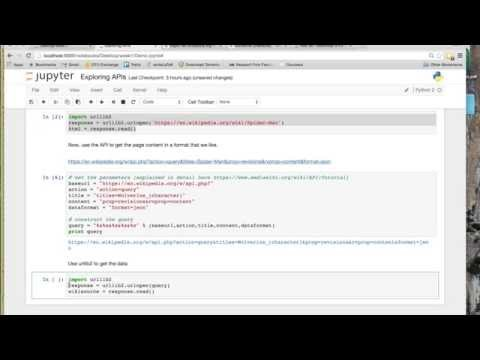

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, back in the day, I had all students first download the names of all the characters, starting from 

* https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters
* https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters

But that resulted in so much pain and suffering that recently I've decided against that. Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[Marvel List](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/marvel_characters.csv)**
* **[DC List](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/dc_characters.csv)**

*The files contain names and corresponding wiki-link. If link if absent, then the character does not have a specific page and information about this particular character can be find in the [Marvel](https://en.wikipedia.org/wiki/Lists_of_Marvel_Comics_characters) or [DC](https://en.wikipedia.org/wiki/Lists_of_DC_Comics_characters) lists* **(BUT YOU DO NOT HAVE TO DO THAT - if you do not feel comfortable with extracting paragraphs from lists it is okay to ignore Comic characters with absent links)** .

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import urllib
import json
import os

sns.set()

In [30]:
df_marvel = pd.read_csv('marvel_characters.csv',sep ='|')
df_marvel = df_marvel.iloc[:,[1,2]]

In [14]:
df_dc = pd.read_csv('dc_characters.csv',sep ='|')
df_dc = df_dc.iloc[:,[1,2]]
df_dc = df_dc.rename(columns = {'WikiLink;':'WikiLink'}, inplace = False)
df_dc['WikiLink'] = df_dc['WikiLink'].str.strip(';')

> ### A challenge
> However, if you're feeling tough, you can head over to our [Hardcore List Parsing](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/Hardcore_List_Parsing.ipynb) notebook, full of tricks to help you try out creating these lists on your own! If you manage to do both Marvel and DC on our own, you will officially have graduated to brown-belt Python hacker. (Black belt challenges coming later in the year.)

In [109]:
def scrape(page_title): # scraping the list page 
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles=" + urllib.parse.quote(page_title)
    
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikijson=json.loads(wikitext)
    wiki = list(wikijson['query']['pages'].values())[0][u'revisions'][0][u'*']
    
    return wiki 

Downloading the Character pages:

In [113]:
# for Marvel
iteration = 0

for row in df_marvel.iterrows():
    
    key = row[1]['CharacterName']
    link = row[1]['WikiLink']
    filename = os.path.join('./data/marvel/', key + '.txt')
    
    if (link != '' and pd.isna(link) == False): ### we either follow a link
        try:
            value = scrape(link)
        except:
            continue
    else: ## or search for content in a wiki-list
        char = key[0]
        if char.isnumeric():
            char = '0–9'
        value = scrape('List_of_Marvel_Comics_characters:_' + char.upper())
        pattern = r'(?<!\=)\={2}(%s[^\=]*)\={2}((?:(?![^\=]\={2}[^\=]).)*)' % key ## for marvel
        value = re.findall(pattern,value.replace('\n',''))
        value = value[-1]

    with open(filename, 'w+', encoding = 'utf-8') as textfile:
        try:
            textfile.write(u'' + value)
        except:
            textfile.write(u'' + value[1])
            
    iteration += 1

In [130]:
# for DC
iteration = 0

for row in df_dc.iterrows():
    
    try:
        key = row[1]['CharacterName'].strip()
        link = row[1]['WikiLink']
        filename = 'data/dc/' +  key + '.txt'
    except:
        continue
    
    if link != '': ### we either follow a link
        try:
            value = scrape(link)
        except:
            continue
    else: ## or search for content in a wiki-list
        char = key[0]
        if char.isnumeric():
            char = '0–9'
            value = scrape('List of DC Comics characters: ' + char.upper())
            pattern = r'(?<!\=)\={2}([^\=]*)\={2}((?:(?![^\=]\={2}[^\=]).)*)' ## for DC
            value = re.findall(pattern,value.replace('\n',' '))
            value = value[-1]
        
        else:
            value = scrape('List_of_DC_Comics_characters:_' + char.upper())
            pattern = r'(?<!\=)\={3}(%s[^\=]*)\={3}((?:(?![^\=]\={3}[^\=]).)*)' % key ## for DC
            value = re.findall(pattern,value.replace('\n',' '))
            try:
                value = value[-1]
            except:
                continue

    with open(filename,'w',encoding = 'utf-8') as textfile:
        try:
            textfile.write(u'' + value)
        except:
            textfile.write(u'' + value[1])
        
    iteration += 1

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both DC and Marvel Characters. 

The nodes in the network will be all the characters, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

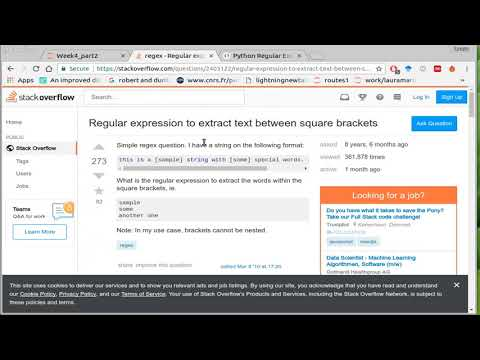

In [3]:
YouTubeVideo("9i_c31v9Nb0",width=800, height=450)

> 
> _Exercise_: Build the network of Comics Characters 

In [131]:
import networkx as nx

# Create the Comics network as a directed graph
comics_graph = nx.DiGraph()

In [132]:
# Add nodes and with data (character name & universe)

# For MARVEL
for character_name in df_marvel['CharacterName']:
    comics_graph.add_node(character_name)
     
    # define universe
    comics_graph.nodes[character_name]['universe'] = 'marvel'
    
# For DC
for character_name in df_dc['CharacterName']:
    comics_graph.add_node(character_name)

    # define universe
    comics_graph.nodes[character_name]['universe'] = 'dc'

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each character. 
> Each page corresponds to a politician, which is a node in your network. 
> Find all the hyperlinks in a characters page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** DC and Marvel characters (and that it is possible that some DC Characters will have links to Marvel Characters and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either DC, or Marvel)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.

In [133]:
# Funtion for adding the links/references between the characters to the graph
def link_input(df, path_name, graph):
    for character_name_in in df['CharacterName']:

        # Load the page of the superhero, in a try-except clause for error catching
        try:
            with open(path_name + character_name_in + '.txt', 'r', encoding = 'utf8') as wiki_page:
                page = wiki_page.read()

            # Get all the reference links on the page (using regex)
            links = re.findall('\[{2}((?!.+?:)([^\]\[]+)\|([^\]\[]+)|([^\|]+?))\]{2}', page)
            reference_links = [(tuple(int(x) if x.isdigit() else x for x in _ if x)) for _ in links]

            for i in range(len(reference_links)):

                for character_name_out in df['CharacterName']:
                    if character_name_out == reference_links[i][0]:
                        # Add edge 1 by 1
                        graph.add_edge(character_name_in, reference_links[i][0])
        except:
            pass
        
    return graph

In [134]:
comics_graph = link_input(df = df_dc, path_name = './data/dc/', graph = comics_graph)
comics_graph = link_input(df = df_marvel, path_name = './data/marvel/', graph = comics_graph)

> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. from which universe they hail).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.

In [135]:
# Remove the isolated nodes from the graph
comics_graph.remove_nodes_from(list(nx.isolates(comics_graph)))

> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 

In [139]:
print("The number of nodes in the Comics network is:", comics_graph.number_of_nodes())

The number of nodes in the Comics network is: 2672


> * More importantly, what is the number of links?

In [140]:
print("The number of links in the Comics network is:", comics_graph.number_of_edges())

The number of links in the Comics network is: 22397


> * What is the number of links connecting Marvel and DC? What do those links mean?

We will find the total number of directed links which connect the two universes below. 

Since this is a directed graph, we do not need to worry about counting links twice, since, in this case, every link will be unique due to its direction.

In [141]:
number_of_links_between_universes = 0

for node_1_name, node_2_name in list(comics_graph.edges()):
    
    # Retrieve the universe of the outgoing node (#1)
    node_1_universe = comics_graph.nodes[node_1_name]['universe']
    
    # Retrieve the universe of the receiving node (#2)
    node_2_universe = comics_graph.nodes[node_2_name]['universe']
    
    # If the unique link is happening between two universes, then increment the total number of such links found
    if (node_1_universe != node_2_universe):
        number_of_links_between_universes += 1

In [142]:
print("The number of links between the two universes is:", number_of_links_between_universes)

The number of links between the two universes is: 165


<span style="color:blue">The links which we found to connect the two universes are representing cross-overs between the different universes. This happens most likely when two comic book creators or authors decide to collaborate, or reward fans with such events. </span>

> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.

Let us plot the in-degree distribution, in linear and log-log scale, using `np.histogram`:

In [149]:
# Here, we have discarded the nodes with degree 0
in_degree_list = [x[1] for x in list(comics_graph.in_degree()) if x[1] != 0]

max_in_degree = max(in_degree_list)
min_in_degree = min(in_degree_list)

print('The maximum in-degree in our network is:', max_in_degree)
print('The minimum in-degree in our network is:', min_in_degree)

The maximum in-degree in our network is: 570
The minimum in-degree in our network is: 1


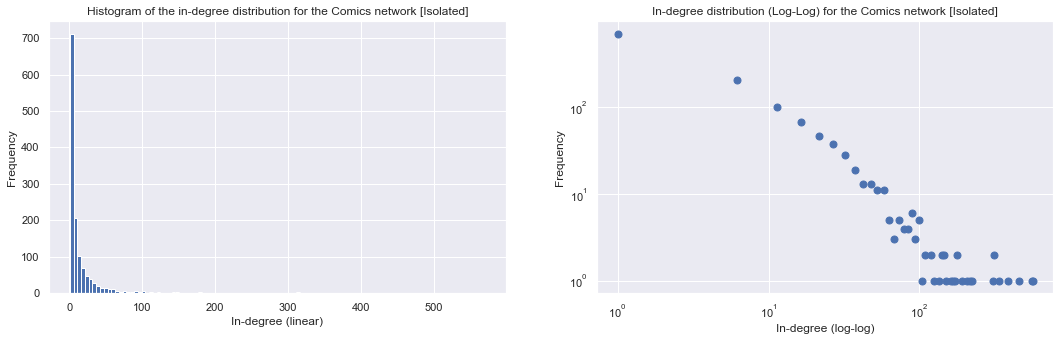

In [155]:
hist, bins = np.histogram(in_degree_list, bins = len(set(in_degree_list)))

fig, axs = plt.subplots(1, 2, figsize = (18, 5))

counts = axs[0].hist(in_degree_list, bins = bins, ec = "white")
axs[0].set_title('Histogram of the in-degree distribution for the Comics network [Isolated]')
axs[0].set_yticks(ticks = range(0, max(hist) + 1, 100));
axs[0].set_xlabel('In-degree (linear)')
axs[0].set_ylabel('Frequency')

axs[1].loglog(bins[:-1], hist, 'bo', markersize = 7)
axs[1].set_title('In-degree distribution (Log-Log) for the Comics network [Isolated]')
axs[1].set_xlabel('In-degree (log-log)')
axs[1].set_ylabel('Frequency');

Now, we will do the same for the out-degree distribution:

In [156]:
out_degree_list = [x[1] for x in list(comics_graph.out_degree()) if x[1] != 0]

max_out_degree = max(out_degree_list)
min_out_degree = min(out_degree_list)

print('The maximum out-degree in our network is:', max_out_degree)
print('The minimum out-degree in our network is:', min_out_degree)

The maximum out-degree in our network is: 67
The minimum out-degree in our network is: 1


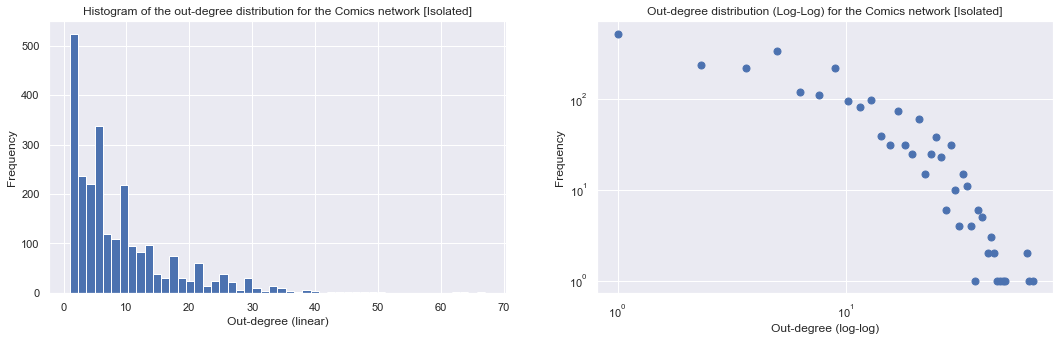

In [157]:
hist, bins = np.histogram(out_degree_list, bins = len(set(out_degree_list)))

fig, axs = plt.subplots(1, 2, figsize = (18, 5))

counts = axs[0].hist(out_degree_list, bins = bins, ec = "white")
axs[0].set_title('Histogram of the out-degree distribution for the Comics network [Isolated]')
axs[0].set_yticks(ticks = range(0, max(hist) + 1, 100));
axs[0].set_xlabel('Out-degree (linear)')
axs[0].set_ylabel('Frequency')

axs[1].loglog(bins[:-1], hist, 'bo', markersize = 7)
axs[1].set_title('Out-degree distribution (Log-Log) for the Comics network [Isolated]')
axs[1].set_xlabel('Out-degree (log-log)')
axs[1].set_ylabel('Frequency');

<span style="color:blue">It seems that the in-degree distribution follows a power-law distribution, much like a scale-free network. It can be clearly seen from the plot and the printing of the max/min in-degree values that there are a select few "hub" nodes which recieve a very large amount of connections from other characters, while most of the network is actually connected only with very few other nodes $(d_{in} < 100)$.</span>

<br>

<span style="color:blue">For the out-degree distribution, it is more tricky. It doesn't seem to be a pure power law, since there are "uneven" local peaks in the degree distribution, however it seems that it still behaves largely according to the power-law rules, albeit in a "toned down" manner. The scale of out-degrees decreases as frequency increases, although not as rapidly as we've seen previously. There still seems to be an outgoing link "hub", with more than 60 outgoing connections.</span>

<br>

<span style="color:blue">The in-degree distribution behaves largely different than the out-degree one, since the in-degree distribution is a direct measure of importance and popularity within the comic book universes, meaning that the more characters connect with a node, the more important that node is to a universe, since it probably means that most volumes published contained the node in its writing. On the other hand, the out-degree distribution refers to how many connections a particular node directly links to. High values for this would probably mean that a character directly influences a number of other characters' stories, which is usually the case for supporting characters, for example.</span>

<br>

<span style="color:blue">It seems very normal the number of in-links of a node would generally be higher than its out-links. This is a fact that can also be seen from the scale of the two plots, since the "in-links" are aggregating all the Wiki mentions across the character pages from the website, whereas "out-links" are relating just to one single Wiki page (that of the character itself). We would expect an aggregation across 2000+ pages to give a larger number of mentions than the number of links can normally can be written about within one single page.</span>

> * Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.

First, we have to find the list of in- and out-degrees for each character individually, before we show the 5 most connected ones:

In [143]:
# Here, we sort all the nodes of the Comics network by their 'IN' degree

# The 'key' attribute of the sorted() function must be callable (i.e. lambda function), and shows what should we sort the list by. 
# In our case, we should sort the list by the second element of each tuple in the list, which is actually the "in-degree" value
connected_nodes_in_list = sorted(dict(comics_graph.in_degree()).items(), key = lambda x: x[1], reverse = True)

In [144]:
# Here, we sort all the nodes of the Comics network by their 'OUT' degree

# Exactly the same as previously
connected_nodes_out_list = sorted(dict(comics_graph.out_degree()).items(), key = lambda x: x[1], reverse = True)

Here, we present the 5 characters with the most "in"-links, which means that other characters refer to those within their Wiki pages.

In [146]:
for character, in_degree in connected_nodes_in_list[:5]:
    node = comics_graph.nodes[character]
    print(character.ljust(25), 'In-degree:', in_degree)

Superman                  In-degree: 570
Batman                    In-degree: 559
Spider-Man                In-degree: 466
Captain America           In-degree: 392
Wonder Woman              In-degree: 340


<span style="color:blue">This is exactly as we would have expected, since the in-degree refers to the number of nodes/characters which "mention you", meaning that the most popular characters across Marvel & DC should be the ones with the highest in-degrees. Superman, Batman, and all the other 3 characters here are widely known main-characters, and most other characters in the comic universes link to them as supporting or antagonist characters.</span>

Let us also present the 5 characters with most "out"-links, meaning that they have most references to other characters.

In [148]:
for character, out_degree in connected_nodes_out_list[:5]:
    node = comics_graph.nodes[character]
    print(character.ljust(25), 'Out-degree:', out_degree)

Brute                     Out-degree: 67
Beast                     Out-degree: 64
Barracuda (II)            Out-degree: 63
Jackal                    Out-degree: 62
Belthera, Queen           Out-degree: 51


<span style="color:blue">These characters are having the largest number of direct outgoing connections to other members of the universes. This means that they are most likely recurring cast of the series, which serve a supporting role, and have met many other characters throughout the comic book volumes. These characters are clearly less popular than the ones we have seen in the list above, therefore, it is hard to say whether they were expected or not, however a long-term comic book fan could probably confirm these findings.</span>

> * Who are the top 5 most connected Marvel characters (again in terms of both in/out-degree)?
> * Who are the top 5 most connected DC characters (again in terms of both in/out-degree)?

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below *(`Isolated` means that we have discarded the nodes with zero degrees)*:
![img](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/week4_degrees.png?raw=true)

> *Tip:* If you want your `matplotlib` plots to look *fancy*, you can download the `seaborn` package and do the following: `import seaborn as sns
sns.set()`


Big thanks to TA Germans for helping design these exercises.